In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [166]:
# read raw data
x_test = pd.read_csv("X_test.csv")
x_train = pd.read_csv("X_train.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [167]:
#creat dataframe
x_train = pd.DataFrame(x_train)
x_train_notnull = x_train.notnull()
x_train_notnull.shape

(1285000, 14)

In [168]:
# Convert the DataFrame to a torch tensor
tensor_x_train = torch.tensor(x_train.values, dtype=torch.float32)
#print(tensor_x_train)

#x_train.describe()

In [169]:
# check if t>10 or <0
x_train_unvaled = x_train[x_train['t'] > 10 ]
x_train_unvaled = x_train[x_train['t'] < 0 ]

print(x_train_unvaled)

Empty DataFrame
Columns: [t, x_1, y_1, v_x_1, v_y_1, x_2, y_2, v_x_2, v_y_2, x_3, y_3, v_x_3, v_y_3, Id]
Index: []


       t  x_1  y_1  v_x_1  v_y_1       x_2       y_2  v_x_2  v_y_2       x_3  \
514  0.0  1.0  0.0    0.0    0.0 -0.450789  0.177112    0.0    0.0 -0.549211   
519  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
520  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
521  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
522  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
..   ...  ...  ...    ...    ...       ...       ...    ...    ...       ...   
766  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
767  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
768  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
769  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   
770  0.0  0.0  0.0    0.0    0.0  0.000000  0.000000    0.0    0.0  0.000000   

          y_3  v_x_3  v_y_3   Id  
514 

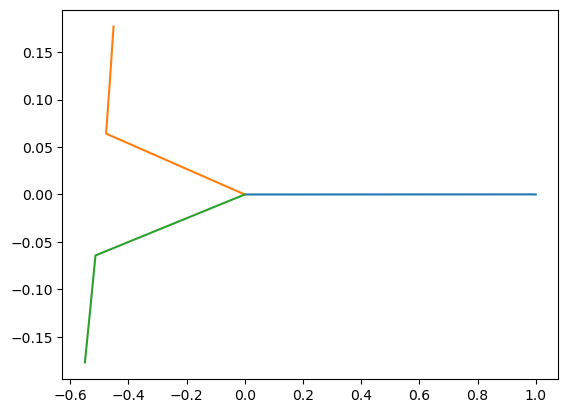

In [175]:
# trajectory visualization
idx = np.hstack((0,x_train[x_train.t == 10].index.values+1))
#k = np.random.randint(idx.shape[0])
k = 2
pltidx = range(idx[k], 257+idx[k])
pltsquare = idx[k]
plt.plot(x_train.x_1[pltidx], x_train.y_1[pltidx])
plt.plot(x_train.x_2[pltidx], x_train.y_2[pltidx])
plt.plot(x_train.x_3[pltidx], x_train.y_3[pltidx])

plt.plot(x_train.x_1[pltsquare], x_train.y_1[pltsquare])
plt.plot(x_train.x_2[pltsquare], x_train.y_2[pltsquare])
plt.plot(x_train.x_3[pltsquare], x_train.y_3[pltsquare])

filtered_data = x_train[(x_train['Id'] >= 514) & (x_train['Id'] <= 770)]
# Print the filtered data
#print(filtered_data)

print(filtered_data[filtered_data['t']==0])



In [94]:
import matplotlib.pyplot as plt

def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()


In [55]:
# plot_y_yhat(x_train, x_train, plot_title = "plot")